# Rhodes Diagram for Ol-Liq data
- We consider a more real word example, using olivine and liquid compositions from Wieser et al. (2021) - https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020GC009364

## Load python things

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt

## Set Plotting Parameters

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Available Data
- Olivine compositions were measured from 3 different samples (indicated by Sample_ID_Ol)
- We also have a number of EPMA measurements of liquids from co-erupted matrix glasses (sample ID indicated by Sample_ID_Liq)
- Lets load these two separate excel sheets in:

In [3]:
## Loading Olivine
Ol_dict=pt.import_excel('Plotting_inputs_Amp_Cpx_Ol_Fspar.xlsx', sheet_name='Olivines_F8')
Ol_Comps=Ol_dict['Ols']

In [4]:
## Loading Liquids
Liq_dict=pt.import_excel('Plotting_inputs_Amp_Cpx_Ol_Fspar.xlsx', sheet_name='Glass_F8')
Liq_Comps=Liq_dict['Liqs']

## Subsampling per eruption
- To plot a Rhodes diagram, we want to plot all the olivines from a single sample, against the average matrix glass Mg# of that sample.
- First, lets find out what unique sample names we have for olivines and liquids using the .unique function

In [5]:
Liq_Comps['Sample_ID_Liq'].unique()

array(['Fissure 8 (May 30th)', 'Fissure 8 (Mid July)',
       'Fissure 8 (Aug 1st)'], dtype=object)

In [6]:
Ol_Comps['Sample_ID_Ol'].unique()

array(['Fissure 8 (Mid July)', 'Fissure 8 (May 30th)',
       'Fissure 8 (Aug 1st)'], dtype=object)

## Lets calculate olivine forsterite contents, and then append this new row onto the Ol_Comps dataframe

In [7]:
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=Ol_Comps)
Ol_Comps['Fo']=Ol_Fo_Calc

### Now lets use the python .loc function to pull out a dataframe of olivines from each sample. 
- Basically saying find all rows where the same name is July.. Aug.. May. 

In [8]:
Ol_Comps_July=Ol_Comps.loc[Ol_Comps['Sample_ID_Ol']== "Fissure 8 (Mid July)"]
Ol_Comps_May=Ol_Comps.loc[Ol_Comps['Sample_ID_Ol']== "Fissure 8 (May 30th)"]
Ol_Comps_Aug=Ol_Comps.loc[Ol_Comps['Sample_ID_Ol']== "Fissure 8 (Aug 1st)"]

## Similarly, lets calculate matrix glass Mg# and append it onto the datafarme of liquid compositions
- Here, we use Fe3Fet=0.15. 

In [9]:
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=Liq_Comps, Fe3Fet_Liq=0.15)
Liq_Comps['Mg#']=Liq_Mgno_calc

### Now lets use the python loc function to pull out liquids for each eruption. 

In [10]:
Liq_Comps_July=Liq_Comps.loc[Liq_Comps['Sample_ID_Liq']== "Fissure 8 (Mid July)"]
Liq_Comps_May=Liq_Comps.loc[Liq_Comps['Sample_ID_Liq']== "Fissure 8 (May 30th)"]
Liq_Comps_Aug=Liq_Comps.loc[Liq_Comps['Sample_ID_Liq']== "Fissure 8 (Aug 1st)"]

### Lets calculate the mean and standard deviation for each eruption in terms of Mg#

In [11]:
Liq_Comps_July_Mean_Mgno=np.nanmean(Liq_Comps_July['Mg#'])
Liq_Comps_May_Mean_Mgno=np.nanmean(Liq_Comps_May['Mg#'])
Liq_Comps_Aug_Mean_Mgno=np.nanmean(Liq_Comps_Aug['Mg#'])

Liq_Comps_July_Std_Mgno=np.nanstd(Liq_Comps_July['Mg#'])
Liq_Comps_May_Std_Mgno=np.nanstd(Liq_Comps_May['Mg#'])
Liq_Comps_Aug_Std_Mgno=np.nanstd(Liq_Comps_Aug['Mg#'])

## Now lets calculate the various equilibrium lines for the Rhodes Diagram

In [12]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352)
0,0.500000,0.769231,0.787402,0.751880,0.746269,0.753012,0.739645
1,0.502020,0.770662,0.788751,0.753384,0.747796,0.754512,0.741198
2,0.504040,0.772087,0.790095,0.754883,0.749317,0.756006,0.742745
3,0.506061,0.773506,0.791432,0.756375,0.750832,0.757493,0.744286
4,0.508081,0.774919,0.792763,0.757861,0.752341,0.758975,0.745822


## Making the plot
- Here, we decide to draw the Ol-Liq field as a shaded grey region between Kd=0.27 from Roeder and Emslie, 1970 as a lower bound, and Matzen (2011) as an upper bound.

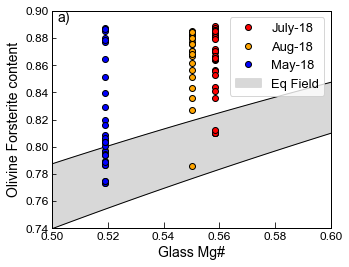

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))

# These lines sort x and arrange y so that we can use the "fill between function"
xfill_pap = np.sort(Rhodes['Mg#_Liq'])
y1fill_pap = Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'] # Choice of lower bound on Kd
y2fill_pap = Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'] # Choice of upper bound on Kd. Could replace with Eq_Ol_Fo_Roeder (Kd=0.33)
ax1.fill_between(xfill_pap, y1fill_pap, y2fill_pap, where=y1fill_pap < y2fill_pap,
                 interpolate=True, color='grey',  alpha=0.3)
ax1.fill_between(xfill_pap, y1fill_pap, y2fill_pap, where=y1fill_pap > y2fill_pap, 
                 interpolate=True, color='grey', linewidth=0.5, alpha=0.3, label='Eq Field')

# This plots the same lines, so that we have a black outline in addition to the grey field
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], '-k', linewidth=1)
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], '-k', linewidth=1)

# Now, we need to plot the data. We want to plot each eruption as a different color, 
#with the x axis equal to the mean of the Mg# of that glass. 
# However, python wants the x coordinate to be the same length, so we do a trick, 
#where we just multiply the average by np.ones, which makes a vector of ones with length equal to the y axis

# Plotting July sample as red
ax1.plot(Liq_Comps_July_Mean_Mgno*np.ones(len(Ol_Comps_July)),
         Ol_Comps_July['Fo'], 'ok', mfc='red', label='July-18')

# Plotting Aug sample as orange
ax1.plot(Liq_Comps_Aug_Mean_Mgno*np.ones(len(Ol_Comps_Aug)),
         Ol_Comps_Aug['Fo'], 'ok', mfc='orange', label='Aug-18')

# Plotting May as blue
ax1.plot(Liq_Comps_May_Mean_Mgno*np.ones(len(Ol_Comps_May)),
         Ol_Comps_May['Fo'], 'ok', mfc='blue', label='May-18')


# Add a legend
ax1.legend(loc='upper right', fontsize=13)

# Add your axes labels
ax1.set_ylabel('Olivine Forsterite content')
ax1.set_xlabel('Glass Mg#')

# Adjust axes limits
ax1.set_ylim([0.74, 0.9]);
ax1.set_xlim([0.5, 0.6]);

# Add a subplot label
ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)

# Save figure to jpg
fig.savefig('Kil-Liq-Ol-Eq.png', dpi=200)